<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/pde/tutorial/fenics_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fenics

     |████████████████████████████████| 286kB 4.7MB/s 
     |████████████████████████████████| 368kB 14.9MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 112kB 20.8MB/s 


In [4]:
!apt-get install software-properties-common
!add-apt-repository ppa:fenics-packages/fenics
!apt-get update
!apt-get install --no-install-recommends fenics

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.12).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
 This PPA provides packages for the FEniCS project.

To use this PPA, please follow the instructions at http://fenicsproject.org.
 More info: https://launchpad.net/~fenics-packages/+archive/ubuntu/fenics
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [8

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


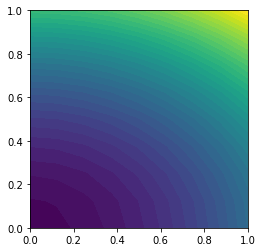

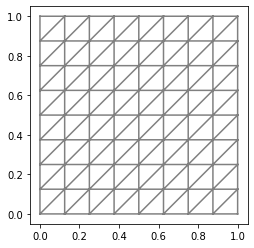

In [5]:
from fenics import *
import matplotlib.pyplot as plt

mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree = 2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a == L, u, bc)

plot(u)
plt.show()
plot(mesh)
plt.show()